In [1]:
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")
library(digar.txts,lib.loc="R_pckg/")

* checking for file ‘/tmp/RtmpwP00nh/remotes76bc33801386/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



Loading required package: data.table



In [2]:
library(tidyverse)
install.packages('tidytext', lib='~/R_pckg')
library(tidytext, lib.loc='~/R_pckg')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [3]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


In [4]:
valiseesti_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti" | keyid=="vabaeestlane" | keyid=="vabaeestisona" | keyid=="voitleja")

In [5]:
head(valiseesti_ajalehed, 5)

DocumentID,keyid,attrs,DocumentDate,DocumentTitle,DocumentType,series,DocumentNumber,DocumentVolume,pages,⋯,n_pages,n_articles_lemmas,n_pages_lemmas,n_articles_metadata,n_pages_metadata,pages_exist,sections_exist,decade,zippath_pages_meta,zippath_sections_meta
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<lgl>,<lgl>,<int>,<chr>,<chr>
eestiteatajastock19450801,eestiteatajastock,1,1 august 1945,Eesti Teataja,NEWSPAPER,staging/all_pubs/all_vols_eestiteatajastock.xml,,,staging/all_pubs/all_vols_eestiteatajastock.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestiteatajastock/eestiteatajastock_1940_pages_meta.zip,
eestiteatajastock19450808,eestiteatajastock,2,8 august 1945,Eesti Teataja,NEWSPAPER,staging/all_pubs/all_vols_eestiteatajastock.xml,,,staging/all_pubs/all_vols_eestiteatajastock.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestiteatajastock/eestiteatajastock_1940_pages_meta.zip,
eestiteatajastock19450815,eestiteatajastock,3,15 august 1945,Eesti Teataja,NEWSPAPER,staging/all_pubs/all_vols_eestiteatajastock.xml,,,staging/all_pubs/all_vols_eestiteatajastock.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestiteatajastock/eestiteatajastock_1940_pages_meta.zip,
eestiteatajastock19450822,eestiteatajastock,4,22 august 1945,Eesti Teataja,NEWSPAPER,staging/all_pubs/all_vols_eestiteatajastock.xml,,,staging/all_pubs/all_vols_eestiteatajastock.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestiteatajastock/eestiteatajastock_1940_pages_meta.zip,
eestiteatajastock19450829,eestiteatajastock,5,29 august 1945,Eesti Teataja,NEWSPAPER,staging/all_pubs/all_vols_eestiteatajastock.xml,,,staging/all_pubs/all_vols_eestiteatajastock.xml.tsv,⋯,6,NA,6,0,6,TRUE,NA,1940,eestiteatajastock/eestiteatajastock_1940_pages_meta.zip,


In [6]:
searchterm <- "balti"
searchfile <- "balti_lemmad.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, valiseesti_ajalehed, searchtype="lemmas", source="pages")

In [7]:
texts1 <- fread("balti_lemmad.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts1[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta <- texts1 %>% select(id, DocumentID) %>% left_join(valiseesti_ajalehed %>% select(keyid,year,month,DocumentID, zippath_sections,zippath_pages),by=c("DocumentID"))

In [8]:
valiseesti_aastad_balti <- fileids_w_meta %>% 
  count(year)

In [9]:
colnames(valiseesti_aastad_balti)[2]  <- "esinemisi_kokku"

In [10]:
subset_meta <- get_subset_meta(valiseesti_ajalehed, source="pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpwP00nh/file76bc55d879e0' has size 0. Returning a NULL data.table.”


In [11]:
subset_wordcounts <- subset_meta %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [12]:
head(subset_wordcounts, 6)

year,words
<int>,<int>
1944,212175
1945,1661642
1946,2286172
1947,3640298
1948,3720132
1949,3451905


In [13]:
colnames(subset_wordcounts)[2]  <- "sonu_kokku"

In [14]:
rootsi_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="estdagbladet" | keyid=="eestiteatajastock" | keyid=="stockholmstid" | keyid=="teatajapoliit" | keyid=="valiseesti")

In [15]:
searchfile <- "balti_lemmad_rootsi.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, rootsi_ajalehed, searchtype="lemmas", source="pages")

In [16]:
texts2 <- fread("balti_lemmad_rootsi.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts2[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta2 <- texts2 %>% select(id, DocumentID) %>% left_join(rootsi_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [17]:
rootsi_aastad_balti <- fileids_w_meta2 %>% 
  count(year)

In [18]:
subset_meta2 <- get_subset_meta(rootsi_ajalehed, source="pages")

In [19]:
subset_wordcounts2 <- subset_meta2 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [20]:
head(subset_wordcounts2, 6)

year,words
<int>,<int>
1944,212175
1945,1661642
1946,2286172
1947,3640298
1948,3720132
1949,3191975


In [21]:
colnames(rootsi_aastad_balti)[2]  <- "esinemisi_kokku_rootsi"
colnames(subset_wordcounts2)[2]  <- "sonu_kokku_rootsi"

In [22]:
kanada_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="vabaeestlane" | keyid=="voitleja")

In [23]:
searchfile <- "balti_lemmad_kanada.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, kanada_ajalehed, searchtype="lemmas", source="pages")

In [24]:
texts3 <- fread("balti_lemmad_kanada.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts3[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta3 <- texts3 %>% select(id, DocumentID) %>% left_join(kanada_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [25]:
kanada_aastad_balti <- fileids_w_meta3 %>% 
  count(year)

In [26]:
subset_meta3 <- get_subset_meta(kanada_ajalehed, source="pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpwP00nh/file76bc49cd5a84' has size 0. Returning a NULL data.table.”


In [27]:
subset_wordcounts3 <- subset_meta3 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [28]:
head(subset_wordcounts3, 5)

year,words
<int>,<int>
1952,1389121
1953,1631876
1954,1722077
1955,1760442
1956,1719398


In [29]:
colnames(kanada_aastad_balti)[2]  <- "esinemisi_kokku_kanada"
colnames(subset_wordcounts3)[2]  <- "sonu_kokku_kanada"

In [30]:
usa_ajalehed <- all_issues %>%
    filter(DocumentType=="NEWSPAPER") %>%
    filter(keyid=="vabaeestisona")

In [31]:
searchfile <- "balti_lemmad_usa.txt"
do_subset_search(searchterm=searchterm, searchfile=searchfile, usa_ajalehed, searchtype="lemmas", source="pages")

In [32]:
texts4 <- fread("balti_lemmad_usa.txt",header=F,sep="\t", quote="")[,.(id=V1,lemmas=V2)]
texts4[,DocumentID:=str_extract(id,"[^\\.]+")]
fileids_w_meta4 <- texts4 %>% select(id, DocumentID) %>% left_join(usa_ajalehed %>% select(keyid, year, month, DocumentID, zippath_sections, zippath_pages), by=c("DocumentID"))

In [33]:
usa_aastad_balti <- fileids_w_meta4 %>% 
  count(year)

In [34]:
subset_meta4 <- get_subset_meta(usa_ajalehed, source="pages")

In [35]:
subset_wordcounts4 <- subset_meta4 %>% 
  group_by(year) %>% 
  summarise(words=sum(PageTextWordCount))

In [36]:
head(subset_wordcounts4, 5)

year,words
<int>,<int>
1949,259930
1950,760216
1951,925559
1952,1077164
1953,1251404


In [37]:
colnames(usa_aastad_balti)[2]  <- "esinemisi_kokku_usa"
colnames(subset_wordcounts4)[2]  <- "sonu_kokku_usa"

In [38]:
graafik <- valiseesti_aastad_balti %>% 
  left_join(subset_wordcounts, by="year") %>%
  left_join(rootsi_aastad_balti, by="year") %>%
  left_join(subset_wordcounts2, by="year") %>%
  left_join(kanada_aastad_balti, by="year") %>%
  left_join(subset_wordcounts3, by="year") %>%
  left_join(usa_aastad_balti, by="year") %>%
  left_join(subset_wordcounts4, by="year")

In [39]:
head(graafik, 20)

year,esinemisi_kokku,sonu_kokku,esinemisi_kokku_rootsi,sonu_kokku_rootsi,esinemisi_kokku_kanada,sonu_kokku_kanada,esinemisi_kokku_usa,sonu_kokku_usa
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1944,52,212175,52,212175,NA,NA,NA,NA
1945,423,1661642,423,1661642,NA,NA,NA,NA
1946,629,2286172,629,2286172,NA,NA,NA,NA
1947,618,3640298,618,3640298,NA,NA,NA,NA
1948,850,3720132,850,3720132,NA,NA,NA,NA
1949,753,3451905,689,3191975,NA,NA,64,259930
1950,898,3947541,672,3187325,NA,NA,226,760216
1951,834,3852615,565,2927056,NA,NA,269,925559
1952,1192,5397700,566,2931415,320,1389121,306,1077164


Warning message:
“Removed 8 row(s) containing missing values (geom_path).”
Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


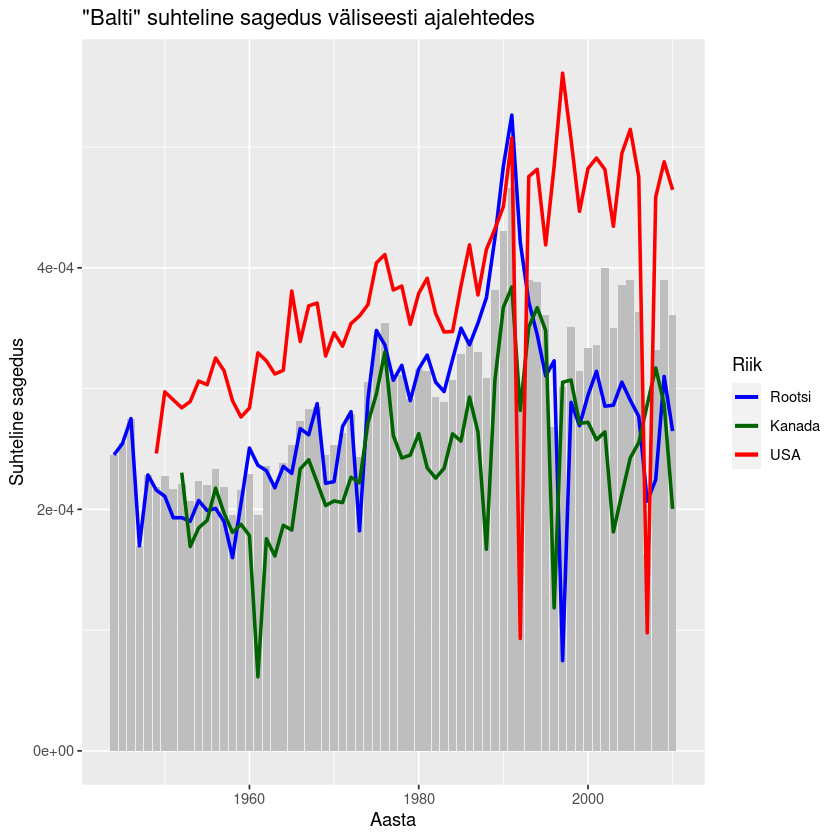

In [40]:
colors <- c("Rootsi"="blue", "Kanada"="darkgreen", "USA"="red")

ggplot(graafik, aes(x=year,y=esinemisi_kokku/sonu_kokku)) +
  geom_bar(stat = "identity", fill = "gray") +
  geom_line(aes(x=year,y=esinemisi_kokku_rootsi/sonu_kokku_rootsi, color="Rootsi"), stat = "identity", size = 1) +
  geom_line(aes(x=year,y=esinemisi_kokku_kanada/sonu_kokku_kanada, color="Kanada"), stat = "identity", size = 1) +
  geom_line(aes(x=year,y=esinemisi_kokku_usa/sonu_kokku_usa, color="USA"), stat = "identity", size = 1) +
  labs(x = "Aasta",
       y = "Suhteline sagedus",
       title = '"Balti" suhteline sagedus väliseesti ajalehtedes') +
  scale_color_manual(name="Riik", values = colors)